<a href="https://colab.research.google.com/github/DrBharathiTC/Play_store-app-review-analysis-Capstone-project/blob/Play_store_app_review_analysis_capstone_project/Google_Play_Store_Apps_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**

# The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
# Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
# Explore and analyze the data to discover key factors responsible for app engagement and success.

# **LIBRARIES USED**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pandas - pd is to manipulate data

numpy - np is to do mathematical operation

matplotlib.pyplot - plt is for data visualization

seaborn - sns is for data visualization

plotly.express - px is for data visualization in more efective way

# **MOUNTING DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **READING DATA FRAME**

In [3]:
PSDF1=pd.read_csv("/content/drive/MyDrive/almabetter projects/EDA-playstore/Playstoredata.csv")

In [4]:
PSDF2=pd.read_csv("/content/drive/MyDrive/almabetter projects/EDA-playstore/User Reviews.csv")

# **NOW WE ARE READING THE AVAILABLE DATA**

In [5]:
PSDF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
PSDF1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
PSDF1.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [10]:
PSDF1.shape

(10841, 13)

In [11]:
PSDF1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [12]:
col_name = PSDF1.columns

In [13]:
col_name

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# **DATA CLEANING**
Data Cleaning It is a crucial step which includes:

Dropping Duplicates Finding NaN, Nulls and missing values Validating data to a standard pattern

### **DROPPING DUPLICATE VALUES**

In [15]:
len(PSDF1[PSDF1.duplicated()])

483

In [16]:
dup = PSDF1[PSDF1.duplicated()]
dup

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [17]:
PSDF1.drop_duplicates(inplace=True,ignore_index=True)
PSDF1.reset_index(inplace=True,drop=True)

In [19]:
len(PSDF1[PSDF1.duplicated()])

0

### **CHECKING NULL OR MISSING VALUES**

In [20]:
PSDF1.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [21]:
PSDF1.isnull().sum().sort_values(ascending= False)

Rating            1465
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

### **CHECKING OUTLIERS**

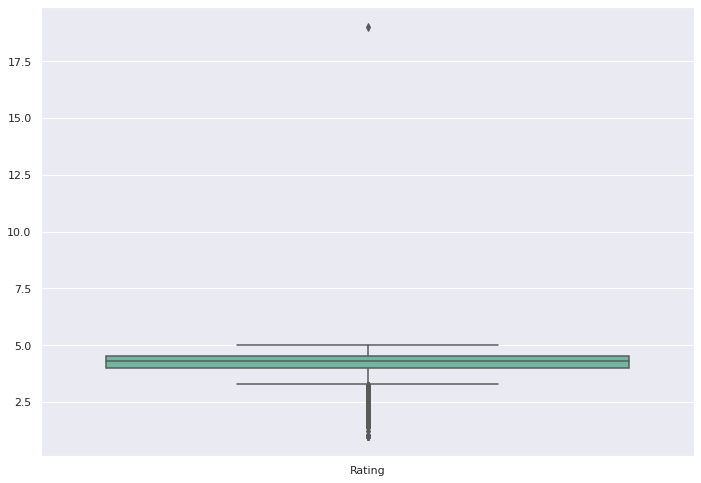

In [22]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=PSDF1, orient="v", palette="Set2")

**DEFINE A FUNCTION**
to get more info from any dataset at once (like data_type, count of apps, missing values in each columns and number of unique elements in each column)

Checking more info using defined function

In [23]:
def playstoreinfo():
  temp=pd.DataFrame(index=PSDF1.columns)
  temp["datatype"]=PSDF1.dtypes
  temp["not null values"]=PSDF1.count()
  temp["null value"]=PSDF1.isnull().sum()
  temp["% of the null value"]=PSDF1.isnull().mean()
  temp["unique count"]=PSDF1.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10358,0,0.000000,9660
Category,object,10358,0,0.000000,34
Rating,float64,8893,1465,0.141437,40
Reviews,object,10358,0,0.000000,6002
Size,object,10358,0,0.000000,462
Installs,object,10358,0,0.000000,22
Type,object,10357,1,0.000097,3
Price,object,10358,0,0.000000,93
Content Rating,object,10357,1,0.000097,6
Genres,object,10358,0,0.000000,120


In [24]:
PSDF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


**CHANGING DATATYPE OF SIZE FROM OBJECT TO FLOAT**

**Converting Size from object to float**

In [25]:
PSDF1['Size'] = PSDF1['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
PSDF1['Size'] = PSDF1['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
PSDF1['Size'] = PSDF1['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
PSDF1['Size'] = PSDF1['Size'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
PSDF1['Size'] = PSDF1['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)
PSDF1['Size'] = PSDF1['Size'].apply(lambda x: float(x))

In [26]:
PSDF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            8832 non-null   float64
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [28]:
PSDF1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**REPLACING '+',',' WITH '' IN 'Installs' TO CONVERT ITS DATA TYPE**

In [29]:
PSDF1['Installs'] = PSDF1['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x) 
PSDF1['Installs'] = PSDF1['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x) 

**REPLACING '$' WITH '' IN 'PRICE' TO CONVERT ITS DATA TYPE**

In [30]:
PSDF1["Price"] = PSDF1["Price"].apply(lambda x:x.replace("$","") if "$" in str(x)else x)

In [31]:
PSDF1.shape

(10358, 13)

In [33]:
PSDFfree = PSDF1[PSDF1.Installs=="Free"]
PSDFfree

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**ROW 9990 REMOVED DUE TO MISSING VALUE OF CATEGORY**

In [35]:
PSDF1.drop(PSDF1.index[9990], inplace=True)

**Converting 'Reviews', 'Installs', 'Size', 'Price' to numerical data type**

In [36]:
PSDF1['Reviews']=pd.to_numeric(PSDF1['Reviews'])
PSDF1['Installs']=pd.to_numeric(PSDF1['Installs'])
PSDF1['Size']=pd.to_numeric(PSDF1['Size'])
PSDF1['Price']=pd.to_numeric(PSDF1['Price'])

In [37]:
PSDF1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


**Getting statitical values of numerical columns.**

In [38]:
PSDF1.describe()

,Rating,Reviews,Size,Installs,Price
count,8892.000000,1.035700e+04,8831.000000,1.035700e+04,10357.000000
mean,4.187877,4.059046e+05,21.287413,1.415776e+07,1.030800
std,0.522377,2.696778e+06,22.540591,8.023955e+07,16.278625
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.200000e+01,4.700000,1.000000e+03,0.000000
50%,4.300000,1.680000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,4.641600e+04,29.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


**Replacing nan values in size with the its median value**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


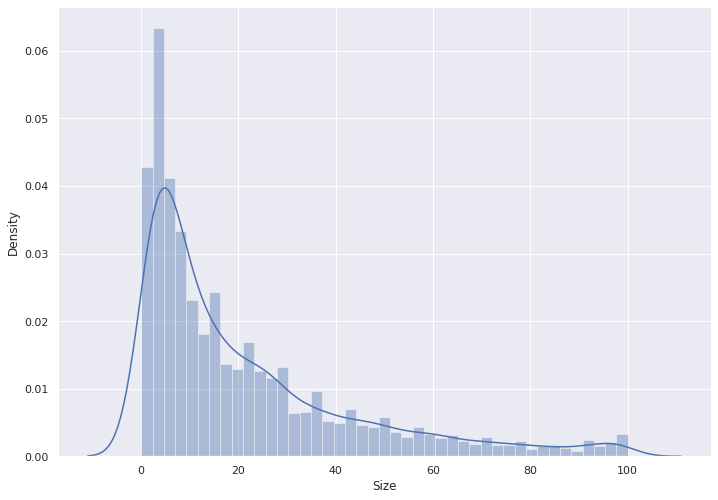

In [39]:
sns.distplot(PSDF1['Size'])

since "size" data distribution is skewed we need to replace missing values with median



In [40]:
PSDF1.Size.fillna(PSDF1.Size.median(),inplace=True)

**Filling missing values , through median and mode in PSDF**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


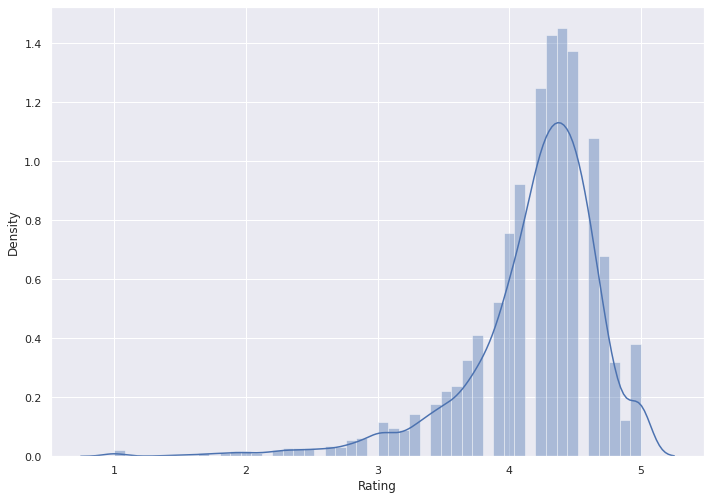

In [41]:
sns.distplot(PSDF1['Rating'])

In [42]:
PSDF1['Rating'].median ()


4.3

In [43]:
PSDF1['Rating'].fillna(4.3,inplace=True)

In [44]:
PSDF1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [45]:
PSDF1['Type'].mode()

0    Free
dtype: object

In [46]:
PSDF1['Content Rating'].mode()

0    Everyone
dtype: object

In [47]:
PSDF1['Android Ver'].mode()

0    4.1 and up
dtype: object

In [48]:
PSDF1['Current Ver'].mode()

0    Varies with device
dtype: object

In [52]:
PSDF1['Type'].fillna('Free',inplace=True)
PSDF1['Content Rating'].fillna('Everyone',inplace=True)
PSDF1['Android Ver'].fillna('4.1 and up',inplace=True)
PSDF1['Current Ver'].fillna('Varies with device',inplace=True)

PSDF1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [53]:
PSDF1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [54]:
PSDF1.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10357,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [55]:
PSDF1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10357 non-null  object 
 12  Android Ver     10357 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


**Dropping the least important columns which are not helpful for our**

In [56]:
PSDF1.drop(['Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)
PSDF1.dropna(inplace=True)

In [57]:
# Calling the function playstoreinfo1 defined above

playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10357,0,0.0,9659
Category,object,10357,0,0.0,33
Rating,float64,10357,0,0.0,39
Reviews,int64,10357,0,0.0,6001
Size,float64,10357,0,0.0,459
Installs,int64,10357,0,0.0,20
Type,object,10357,0,0.0,2
Price,float64,10357,0,0.0,92
Content Rating,object,10357,0,0.0,6
Genres,object,10357,0,0.0,119


**Getting the statistical info about the numerical data**


In [58]:
PSDF1.describe()

,Rating,Reviews,Size,Installs,Price
count,10357.000000,1.035700e+04,10357.000000,1.035700e+04,10357.000000
mean,4.203737,4.059046e+05,20.066346,1.415776e+07,1.030800
std,0.485594,2.696778e+06,21.019993,8.023955e+07,16.278625
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,5.700000,1.000000e+03,0.000000
50%,4.300000,1.680000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,4.641600e+04,26.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


# **EXPLORATORY ANALYSIS**

We will perform analysis based on

Univariate study

Multivariate study

# **1. UNIVARIATE ANALYSIS**

**Top 35 category present**

In [59]:
top_categories = PSDF1['Category'].value_counts().sort_values(ascending=False).head(35)
top_categories

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

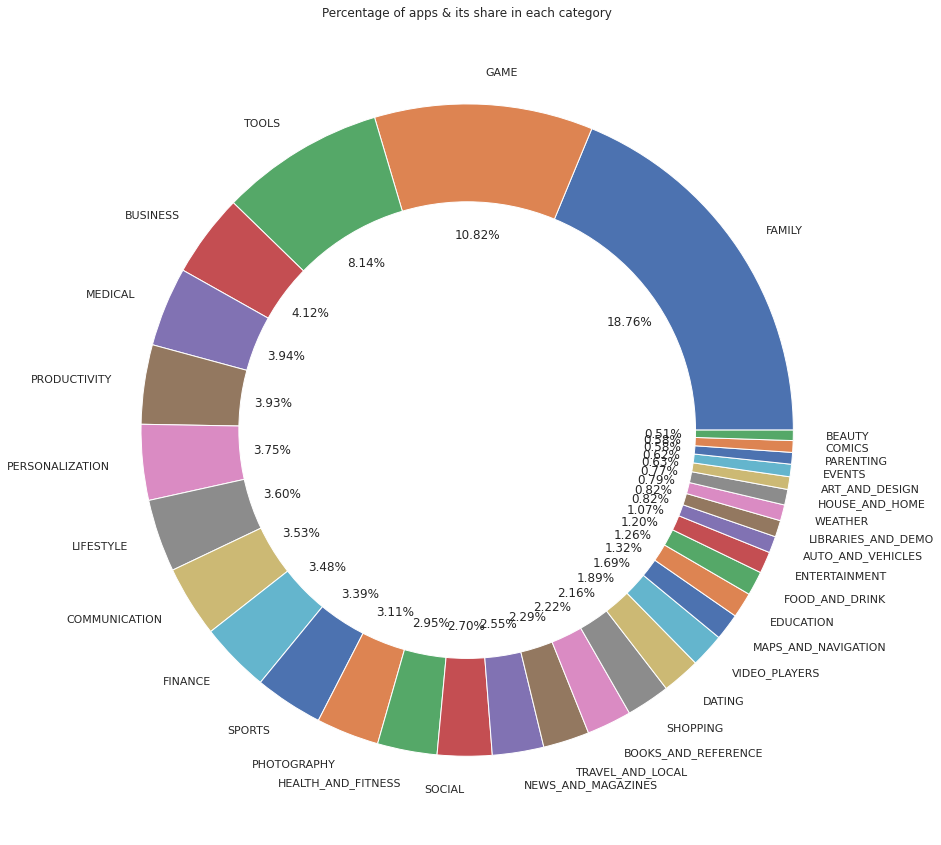

In [60]:
plt.figure(figsize=(20,15))

plt.pie(PSDF1.Category.value_counts(), labels=PSDF1.Category.value_counts().index , autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Percentage of apps & its share in each category')
plt.show()

From the above univariate study i.e doughnut chart we can conclude that there are greater number of apps related to categories: Family- 18.7% Game- 10.8% Tools-8.1%

In [61]:
a=[]
b=[]
for el in range(len(top_categories)):
    a.append(top_categories.index[el])
    b.append(top_categories[el])

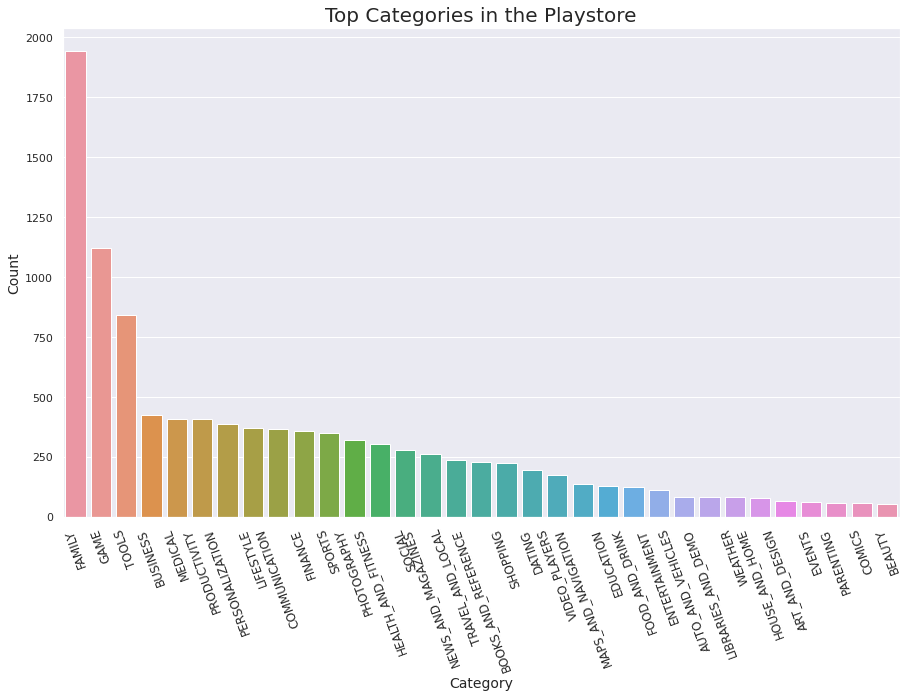

In [62]:
plt.figure(figsize=(15,9))
plt.ylabel('Count',fontsize=14)
plt.xlabel('Category',fontsize=14)
graph = sns.barplot(x=a,y=b)
graph.set_xticklabels(graph.get_xticklabels(), rotation=110, fontsize=12)
graph.set_title("Top Categories in the Playstore", fontsize = 20);

From above graph we can conclude that there is 1939 applications which falls under FAMILY category.

Also top 5 categories of Application in the playstore are FAMILY,GAME,TOOLS,,BUSINESS,MEDICAL.

Also there is only 53 applications which falls under BEAUTY category.
We can also conclude that there is significant difference between the top two categories FAMILY 1939 Apps and GAME 1121 Apps. This shows that there are more application developers who develops Apps under FAMILY Category.

**Top 35 genres**

In [66]:
top_genres = PSDF1['Genres'].value_counts().sort_values(ascending=False).head(35)

print(top_genres)

Tools                      842
Entertainment              588
Education                  527
Business                   427
Medical                    408
Productivity               407
Personalization            388
Lifestyle                  372
Communication              366
Sports                     364
Finance                    360
Action                     356
Photography                322
Health & Fitness           306
Social                     280
News & Magazines           264
Travel & Local             236
Books & Reference          230
Shopping                   224
Arcade                     218
Simulation                 199
Dating                     196
Casual                     191
Video Players & Editors    173
Maps & Navigation          137
Puzzle                     136
Food & Drink               124
Role Playing               109
Strategy                   105
Racing                      98
Auto & Vehicles             85
Libraries & Demo            85
Weather 

**Plotting genres w.r.t apps**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


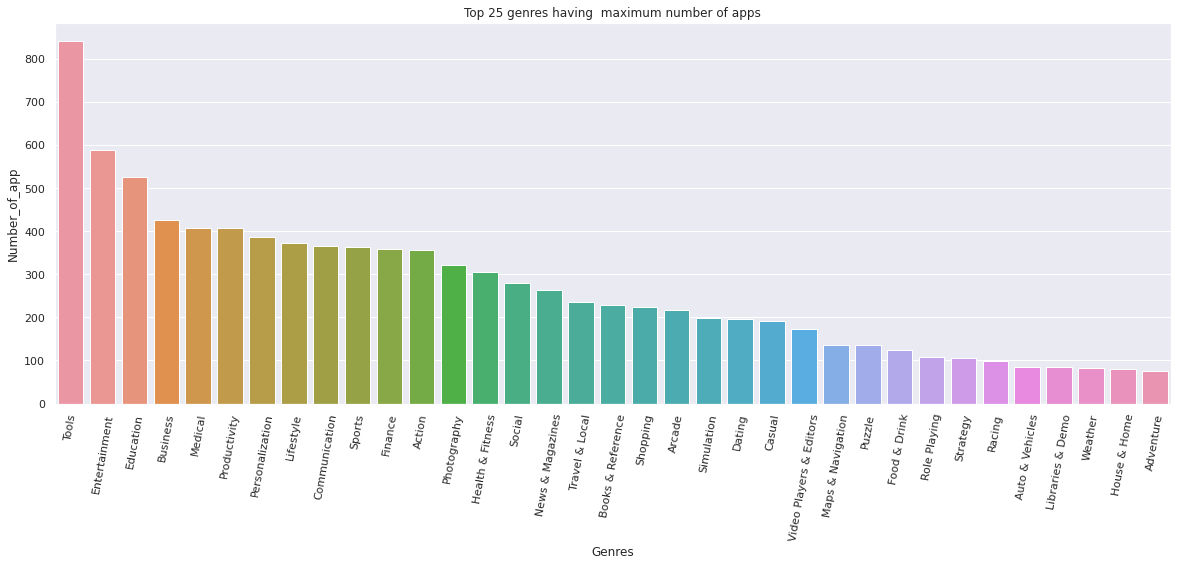

In [67]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=80)
plt.xlabel("Genres")
plt.ylabel("Number_of_app")
plt.title("Top 25 genres having  maximum number of apps")
sns.barplot(top_genres.index,top_genres.values)

From above bar plot in plotly we can conclude that maximum application which have been developed falls under App Genre Tools 840.

Also from above we can observe from above plot that least applications were developed under App Genre Entermainment,Music & Video 23.

Also top 5 Genres are Tools,Entertaiment,Education,business and Medical which are 840,587,427,407,460 in Top 5 Genre name order.

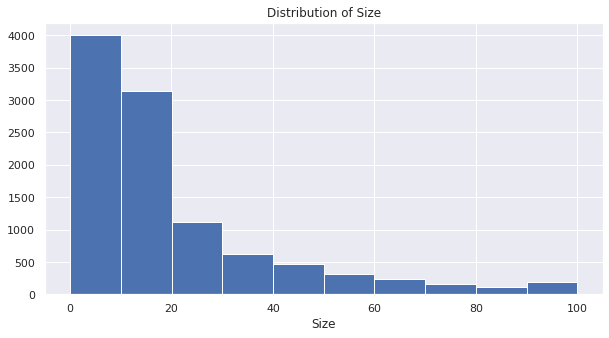

In [68]:
# Histogram of size column
plt.figure(figsize= (10,5))
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(PSDF1['Size']);
plt.show()